In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#unix command prompt kodların çalışması için klasörü py uzantılı script'in
#bulunduğu yere almamız gerekli
!ls
%cd "/content/drive/MyDrive/ColabNotebook/_COvid"
!ls

drive  sample_data
/content/drive/MyDrive/ColabNotebook/_COvid
 1.Deneme_Sonuclar  'Atakan ipybn'   CT_COVID  'Run Covid-CT.ipynb'
 2.Deneme_Sonuclar   Covid-CT.py     Dataset    Sonuclar


In [ ]:
# çalıştırılmayacak, sadece bu değerleri aşağıdaki komutlara kopyala yapıştır yapabilmek için yazdım
INIT_LR = 1e-3
EPOCHS = 50
BS = 8
trainNumber = 720 #746
IMG_SIZE = 224

help="Input to select pretrained top model, default is 'resnet50'. mobilenet_v2, vgg16, efficientnet-b3,\
	are available.")

Mounted at /content/drive


In [ ]:
#efficient net'i eklemek için çalıştırılması gerekiyor.
!pip install git+https://github.com/qubvel/efficientnet

In [ ]:
## Kodların Test Edilmesi için 1 epoch ile denemeler yapıldı
# savemodel kısmında sadece deneme sayısını belirten bir klasör ismi girmek yeterli
# içerisinde ağın adıyla ilgili klasörü otomatik oluşturup sonuç grafiğini, eğitilmiş ağı
# train history'i kaydediyor.

!python Covid-CT.py --dataset /content/drive/MyDrive/ColabNotebook/_COvid/CT_COVID \
--savemodel ./2.Deneme_Sonuclar \
--epochs 1 \
--topmodel resnet50

!python Covid-CT.py --dataset /content/drive/MyDrive/ColabNotebook/_COvid/CT_COVID \
--savemodel ./2.Deneme_Sonuclar \
--epochs 1 \
--topmodel mobilenet_v2

!python Covid-CT.py --dataset /content/drive/MyDrive/ColabNotebook/_COvid/CT_COVID \
--savemodel ./2.Deneme_Sonuclar \
--epochs 1 \
--topmodel vgg16

!python Covid-CT.py --dataset /content/drive/MyDrive/ColabNotebook/_COvid/CT_COVID \
--savemodel ./2.Deneme_Sonuclar \
--epochs 1 \
--topmodel efficientnet-b3

In [ ]:
# Sonuç almaya yönelik 50 epoch ile deneyin tekrar edilmesi için çalıştırılacak

!python Covid-CT.py --dataset /content/drive/MyDrive/ColabNotebook/_COvid/CT_COVID \
--savemodel ./Sonuclar \
--epochs 50 \
--topmodel resnet50

!python Covid-CT.py --dataset /content/drive/MyDrive/ColabNotebook/_COvid/CT_COVID \
--savemodel ./Sonuclar \
--epochs 50 \
--topmodel mobilenet_v2

!python Covid-CT.py --dataset /content/drive/MyDrive/ColabNotebook/_COvid/CT_COVID \
--savemodel ./Sonuclar \
--epochs 50 \
--topmodel vgg16

!python Covid-CT.py --dataset /content/drive/MyDrive/ColabNotebook/_COvid/CT_COVID \
--savemodel ./Sonuclar \
--epochs 50 \
--topmodel efficientnet-b3

2020-12-06 09:40:19.374417: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
######################### resnet50 Train Starts #################################
########[ARGS INFO]########
TOP MODEL NAME: resnet50
DATASET PATH: /content/drive/MyDrive/ColabNotebook/_COvid/CT_COVID
MODEL SAVE PATH: ./Sonuclar
EPOCHS: 50
BATCH SIZE: 8
INIT_LR: 0.001
trainNumber: 720
######[END ARGS INFO]#######
tcmalloc: large alloc 1097031680 bytes == 0x1550a000 @  0x7fc3715651e7 0x7fc36dcc15e1 0x7fc36dd25c78 0x7fc36dd25d93 0x7fc36ddc3ea8 0x7fc36ddc4704 0x7fc36ddc4852 0x566f73 0x59fd0e 0x7fc36dd114ed 0x50a12f 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x507be4 0x588d41 0x59fd0e 0x7fc36dd114ed 0x50a12f 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x507be4 0x50ad03 0x634e72 0x634f27 0x6386df
tcmalloc: large alloc 1316126720 bytes == 0xbd0b4000 @  0x7fc3715651e7 0x7fc36dcc15e1 0x7fc36dd25c78 0x7fc36dd25d93 0x7fc36ddc3ea8 0x7fc36ddc4704 0x7

In [ ]:
import os
import ast
import matplotlib.pyplot as plt
import numpy as np
nets=["efficientnet-b3", "vgg16", "mobilenet_v2", "resnet50"]

for net in nets:
  path=os.path.join("/content/drive/MyDrive/ColabNotebook/_COvid","Sonuclar",net)
  text_file = open(os.path.join(path,net+"_TrainHistory"), "r")
  TrainHistory=text_file.read()
  text_file.close()
  TrainHistory = ast.literal_eval(TrainHistory)
  # plot the training loss and accuracy
  print("################ {} Grafiği ###############".format(net))
  N = len(TrainHistory["loss"])
  plt.style.use("ggplot")
  plt.figure()
  plt.axis([0, N, 0, 2])
  plt.plot(np.arange(0, N), TrainHistory["loss"], label="train_loss")
  plt.plot(np.arange(0, N), TrainHistory["val_loss"], label="val_loss")
  plt.plot(np.arange(0, N), TrainHistory["accuracy"], label="train_acc")
  plt.plot(np.arange(0, N), TrainHistory["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy on COVID-19 Dataset")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend(loc="upper right")
  plt.savefig(os.path.join(path,net+"_0-2_TrainPlot_UpRght_ku.svg"),format='svg', dpi=1200)
  print("############################################")

In [ ]:
import os
import ast
import matplotlib.pyplot as plt
import numpy as np
nets=["efficientnet-b3", "vgg16", "mobilenet_v2", "resnet50"]

for net in nets:
  path=os.path.join("/content/drive/MyDrive/ColabNotebook/_COvid","Sonuclar",net)
  text_file = open(os.path.join(path,net+"_TrainHistory"), "r")
  TrainHistory=text_file.read()
  text_file.close()
  TrainHistory = ast.literal_eval(TrainHistory)
  # plot the training loss and accuracy
  print("################ {} Grafiği ###############".format(net))
  N = len(TrainHistory["loss"])
  plt.style.use("ggplot")
  plt.figure()
  plt.axis([0, N, 0, 2])
  plt.plot(np.arange(0, N), TrainHistory["loss"], label="train_loss")
  plt.plot(np.arange(0, N), TrainHistory["val_loss"], label="val_loss")
  plt.plot(np.arange(0, N), TrainHistory["accuracy"], label="train_acc")
  plt.plot(np.arange(0, N), TrainHistory["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy on COVID-19 Dataset")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend(loc="upper right")
  plt.savefig(os.path.join(path,net+"_0-2_TrainPlot_UpRght_ku.eps"),format='eps', dpi=1200)
  print("############################################")

In [ ]:
import ast
nets=["efficientnet-b3", "vgg16", "mobilenet_v2", "resnet50"]
path=os.path.join("/content/drive/MyDrive/ColabNotebook/_COvid","Sonuclar",nets[0])
text_file = open(os.path.join(path,nets[0]+"_TrainHistory"), "r")
TrainHistory=text_file.read()
text_file.close()
print(TrainHistory)
TrainHistory = ast.literal_eval(TrainHistory)
print(TrainHistory["loss"])

In [ ]:
import os
import ast
import matplotlib.pyplot as plt
import numpy as np
nets=["efficientnet-b3", "vgg16", "mobilenet_v2", "resnet50"]

for net in nets:
  path=os.path.join("/content/drive/MyDrive/ColabNotebook/_COvid","Sonuclar",net)
  text_file = open(os.path.join(path,net+"_TrainHistory"), "r")
  TrainHistory=text_file.read()
  text_file.close()
  TrainHistory = ast.literal_eval(TrainHistory)
  print("{} Best Validation Accuracy: \t{}".format(net,max(TrainHistory["val_accuracy"])))

efficientnet-b3 Best Validation Accuracy: 	0.9930555820465088
vgg16 Best Validation Accuracy: 	0.9861111044883728
mobilenet_v2 Best Validation Accuracy: 	0.9652777910232544
resnet50 Best Validation Accuracy: 	0.9722222089767456


In [ ]:
import os
import ast
import matplotlib.pyplot as plt
import numpy as np
nets=["efficientnet-b3", "vgg16", "mobilenet_v2", "resnet50"]

for net in nets:
  path=os.path.join("/content/drive/MyDrive/ColabNotebook/_COvid","Sonuclar",net)
  text_file = open(os.path.join(path,net+"_TrainHistory"), "r")
  TrainHistory=text_file.read()
  text_file.close()
  TrainHistory = ast.literal_eval(TrainHistory)
  print("{} Best Validation Loss: \t{}".format(net,min(TrainHistory["val_loss"])))

efficientnet-b3 Best Validation Loss: 	0.025443069636821747
vgg16 Best Validation Loss: 	0.10336481779813766
mobilenet_v2 Best Validation Loss: 	0.17109441757202148
resnet50 Best Validation Loss: 	0.21533077955245972


################ mobilenetHistory.txt Grafiği ###############
############################################


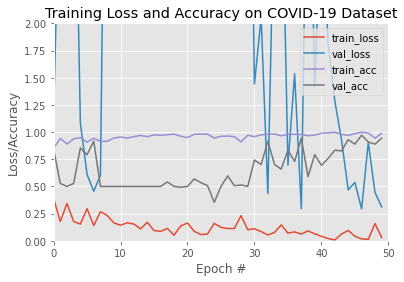

In [ ]:
import os
import ast
import matplotlib.pyplot as plt
import numpy as np

net="mobilenetHistory.txt"
path=os.path.join("/content/drive/MyDrive/ColabNotebook/_COvid","Sonuclar","mobilenet_v2")
text_file = open(os.path.join(path,net), "r")
TrainHistory=text_file.read()
text_file.close()
TrainHistory = ast.literal_eval(TrainHistory)
# plot the training loss and accuracy
print("################ {} Grafiği ###############".format(net))
N = len(TrainHistory["loss"])
plt.style.use("ggplot")
plt.figure()
plt.axis([0, N, 0, 2])
plt.plot(np.arange(0, N), TrainHistory["loss"], label="train_loss")
plt.plot(np.arange(0, N), TrainHistory["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), TrainHistory["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), TrainHistory["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.savefig(os.path.join(path,net+"_0-2_TrainPlot_UpRght_ku.svg"),format='svg', dpi=1200)
print("############################################")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


################ mobilenetHistory.txt Grafiği ###############
############################################


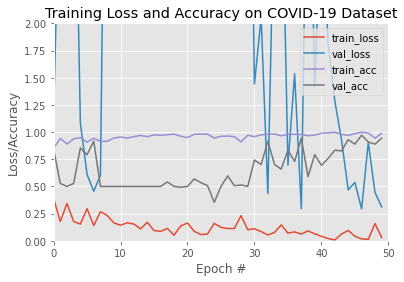

In [ ]:
import os
import ast
import matplotlib.pyplot as plt
import numpy as np

net="mobilenetHistory.txt"
path=os.path.join("/content/drive/MyDrive/ColabNotebook/_COvid","Sonuclar","mobilenet_v2")
text_file = open(os.path.join(path,net), "r")
TrainHistory=text_file.read()
text_file.close()
TrainHistory = ast.literal_eval(TrainHistory)
# plot the training loss and accuracy
print("################ {} Grafiği ###############".format(net))
N = len(TrainHistory["loss"])
plt.style.use("ggplot")
plt.figure()
plt.axis([0, N, 0, 2])
plt.plot(np.arange(0, N), TrainHistory["loss"], label="train_loss")
plt.plot(np.arange(0, N), TrainHistory["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), TrainHistory["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), TrainHistory["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.savefig(os.path.join(path,net+"_0-2_TrainPlot_UpRght_ku.eps"),format='eps', dpi=1200)
print("############################################")